# Project No: 1                                                                  
# House Price Prediction

# Linear Regression

Linear regression is a supervised learning algorithm in machine learning that is used for predicting continuous numerical output values. It is a statistical method that is widely used for modeling the relationship between a dependent variable and one or more independent variables.                      


In linear regression, the goal is to find a linear relationship between the input variables (also known as features or independent variables) and the output variable (also known as the dependent variable). The linear relationship is represented by a linear equation of the form:


                                                          
 # y = mx + b
  
# y                                              
is the output variable,                                     
# x                                                          
is the input variable,                                                     
# m                                                              
is the slope of the line,                                                   
# b                                                                    
is the y-intercept.                                                 

The linear regression algorithm aims to find the values of m and b that minimize the error between the predicted output values and the actual output values.

The linear regression model can be used to make predictions on new data points by plugging in the input values into the linear equation and calculating the output value.

There are two main types of linear regression:

# simple linear regression                                                  
 In simple linear regression, there is only one input variable.                            
 
# multiple linear regression, 
there are multiple input variables.

Linear regression is widely used in various fields such as finance, economics, and social sciences to model and predict numerical data.




Regenerate response

# RMSE:                                                        
 It is the square root of mean squared error (MSE).
 
# MAE:                                           
It is an absolute sum of actual and predicted differences, but it lacks mathematically, that’s why it is rarely used, as compared to other metrics.                                                  



# steps                                  
1 Data Loading                              
2 Preprocessing                                 
3 Data analysis
4 Evaluation                                    
5 XGRregression                                       
6 Train Test split  
7 Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Data Loading

In [2]:
house_price = sklearn.datasets.load_boston()

C:\Users\Noor Saeed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

In [4]:
# print(house_price) (data,columns,index) [data,columns, index]

In [5]:
df = pd.DataFrame(house_price.data,columns=house_price.feature_names)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Preprocessing

In [8]:
# price column
df['price'] = house_price.target

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# check no of rows and cols in dataframe
df.shape

(506, 14)

In [12]:
df.isna().sum()  

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

<AxesSubplot:>

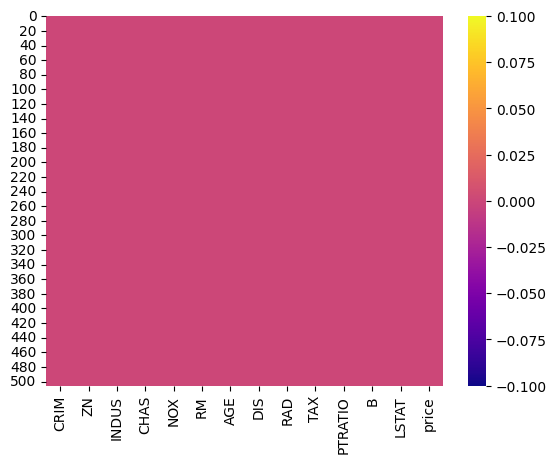

In [14]:
sns.heatmap(df.isna(),cmap='plasma')

In [15]:
# statistics analysis
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# correlation bw features of our dataset
# 1 positive corr:  (if one feature increases then the other also increases)
# 2 negative corr: (if one feature decreases then the other also decreases)


In [17]:
correlation = df.corr()

<AxesSubplot:>

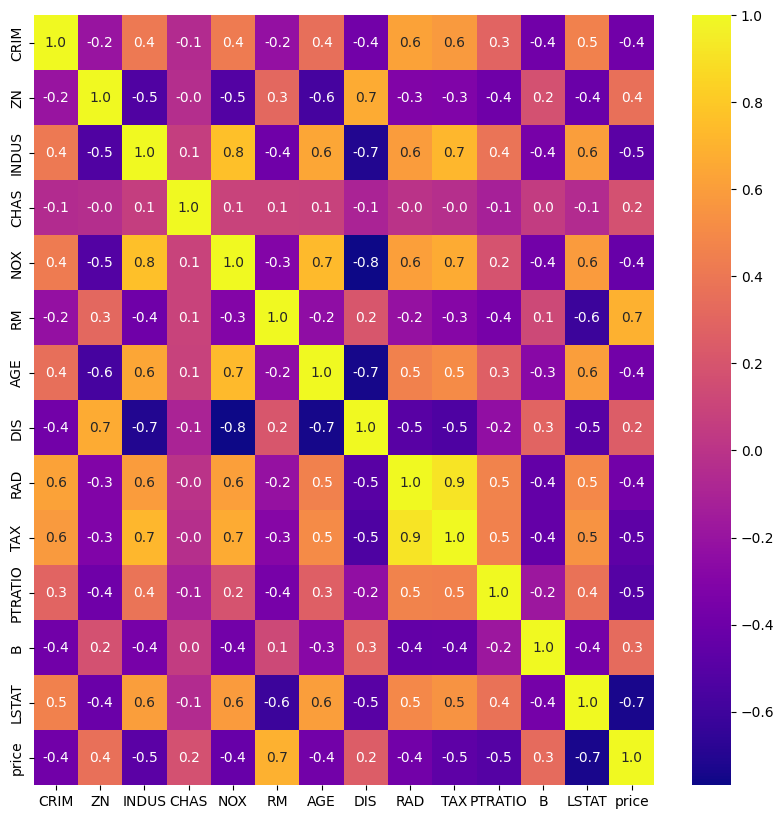

In [22]:
# using heatmap for correlation
plt.figure(figsize=(10,10)) # 10 by 10 inches
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':10}, square=True,cmap="plasma")

# Train Test split data

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# splitting data
X = df.drop(['price'],axis=1)
Y = df['price']

In [25]:
print(X,Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [30]:
df.shape

(506, 14)

In [31]:
X_train.shape

(455, 13)

In [32]:
X_test.shape

(51, 13)

In [33]:
y_train.shape

(455,)

In [34]:
y_test.shape

(51,)

# Training model

In [36]:
model = LinearRegression()

In [37]:
# Training the model
model.fit(X_train,y_train)

LinearRegression()

In [39]:
# prediction on training data
training_data_prediction = model.predict(X_train)

In [40]:
# check the predicted price
print(training_data_prediction)

[31.5668219   6.42047365 34.61231978 20.19919702 19.51874729 19.48074228
 18.48312669 15.57116874 22.64671908 19.34703942 16.67330665 18.34015968
 32.78524959 35.5394515  24.55359768 42.02232025 32.40854819 14.47791874
 27.33923812  8.08535644  5.54924816 22.3142853  18.79618183 30.42152382
 26.11487114 24.1991422  24.59504815 25.39533069 24.8260185  34.26588302
 19.55618783 20.776005   28.22838987 37.88497812 36.96745297 22.08204611
 29.22666116 30.89013173 18.24167464 20.79066493 19.31632195 18.62534577
 37.45153126 39.86034357  9.25838179 35.81305012 30.66696319 21.03797074
 13.69745986 31.55535127 25.03749197 25.02570426 23.25783934 19.79813574
 30.72874946 13.10601284 12.57380597 21.51468942 11.36341529 13.6106891
 23.08468455 16.3862951  11.90702918 32.54362861 25.22702529 30.1367939
 19.76429894 24.20975042 23.77654998 30.55402172 19.21602052 32.85777871
  4.25140951 40.72825094 24.35267162 19.54663308 23.26473175 21.34625134
 25.3089128  22.68114779 33.54649861 25.21553826  8.2

# Evaluation

In [41]:
# comparison bw actual values and predicted values will drop an error for that we use 
score1 = metrics.mean_absolute_error(y_train,training_data_prediction)
score2 = metrics.mean_squared_error(y_train,training_data_prediction)
score3 = np.sqrt(metrics.mean_squared_error(y_train,training_data_prediction))
print(score1)
print(score2)
print(score3)

3.292462813336411
21.94064937040998
4.684084688646222


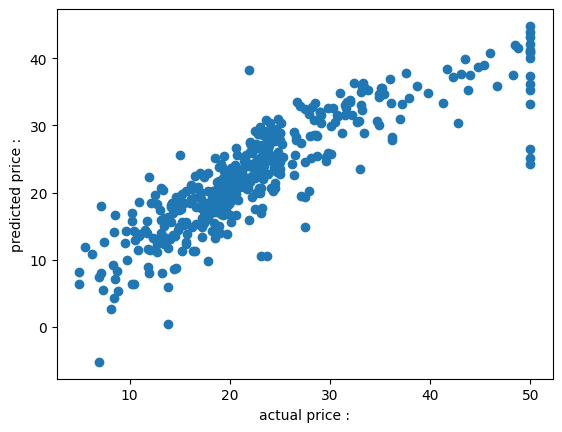

In [44]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('actual price :')
plt.ylabel('predicted price :')
plt.show()

# prediction on testing data


In [45]:
test_data_prediction = model.predict(X_test)
# check the predicted price
print(test_data_prediction)

[23.0714571  20.79057109 34.28353779 31.13292685  3.02620792  3.18651779
 27.30969026 22.31137146 14.52107044 21.38770874 31.05209087 26.89051408
 21.15034286 18.45145984 17.76797156 25.04240295 23.73248835 13.39359584
  8.82146104 18.6152667  21.90763174 20.1693289  36.33207523 20.69766619
 19.90218665 16.01855886 36.98683895 34.78213585 31.27653683 23.30906528
 18.54256667 20.93454829 32.13759634 30.3842925  13.19305481 15.88887621
 13.61536632 23.53202591 25.83412837 23.15947037 28.99919772 12.22330893
 31.00145021  6.12879747 23.70651398 20.62700768 33.21290823 19.24232643
 35.51897478  0.59561485 31.66247527]


In [46]:
score1 = metrics.mean_absolute_error(y_test,test_data_prediction)
score2 = metrics.mean_squared_error(y_test,test_data_prediction)
score3 = np.sqrt(metrics.mean_squared_error(y_test,test_data_prediction))

print(score1)
print(score2)
print(score3)

3.412907902616933
22.41896907656738
4.734867376872068


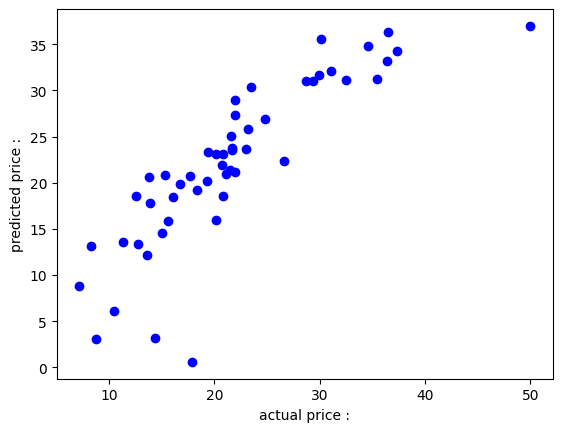

In [47]:
plt.scatter(y_test,test_data_prediction,color='b')
plt.xlabel('actual price :')
plt.ylabel('predicted price :')
plt.show()
plt.show()

# OOPs Our Model Is Not Predicting Good